# Example loading, viewing, exploring, plotting and saving plots.

### AMAV Webinar 1

##### *'...make both calculations and graphs. Both sorts of output should be studied; each will contribute to understanding.' -- F. J. Anscombe, 1973*

In [1]:
# Load libraires 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Make it easier to show plots
%matplotlib inline

In [2]:
df = pd.read_csv('./data/DatasaurusDozen.tsv', sep='\t')

In [3]:
df.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [4]:
df['dataset'].value_counts()

star          142
dino          142
v_lines       142
slant_down    142
wide_lines    142
slant_up      142
high_lines    142
h_lines       142
circle        142
x_shape       142
bullseye      142
away          142
dots          142
Name: dataset, dtype: int64

In [5]:
data = df[df['dataset']=='dino']

In [6]:
data.shape

(142, 3)

In [7]:
# Helper function to get a dataset
def get_dataset(name):
    return df[df['dataset']==name]

In [8]:
get_dataset('circle')

,dataset,x,y
1136,circle,55.993030,79.277264
1137,circle,50.032254,79.013071
1138,circle,51.288459,82.435940
1139,circle,51.170537,79.165294
1140,circle,44.377915,78.164628
1141,circle,45.010270,77.880863
1142,circle,48.559817,78.788371
1143,circle,42.142268,76.880635
1144,circle,41.026972,76.409588
1145,circle,34.575309,72.724841


### Discussion point 1:
#### What do we think we can conlcude about the datasets from the summary stats?

In [9]:
# Descriptive statistics
data.describe()

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


In [10]:
# Descriptive statistics
df.groupby('dataset').mean()

,x,y
dataset,,
away,54.266100,47.834721
bullseye,54.268730,47.830823
circle,54.267320,47.837717
dino,54.263273,47.832253
dots,54.260303,47.839829
h_lines,54.261442,47.830252
high_lines,54.268805,47.835450
slant_down,54.267849,47.835896
slant_up,54.265882,47.831496


In [11]:
df.groupby('dataset').std()

,x,y
dataset,,
away,16.769825,26.939743
bullseye,16.769239,26.935727
circle,16.760013,26.930036
dino,16.765142,26.935403
dots,16.767735,26.930192
h_lines,16.765898,26.939876
high_lines,16.766704,26.939998
slant_down,16.766759,26.936105
slant_up,16.768853,26.938608


### Discussion point2 :

#### Has our viewpoint changed now we have plotted the data?


In [12]:
## Create a function to show a scatterplot of the data

def show_scatter(df, dataset_name, xlim=(-5, 105), ylim=(-5, 105), color="black", marker="o", reg_fit=False):
    sns.regplot("x", y="y", data=df, ci=None, fit_reg=reg_fit, marker=marker,
           scatter_kws={"s": 50, "alpha": 0.7, "color":color},
                line_kws={"linewidth":4, "color":"red"})
    plt.title(dataset_name)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.tight_layout()
    plt.show()

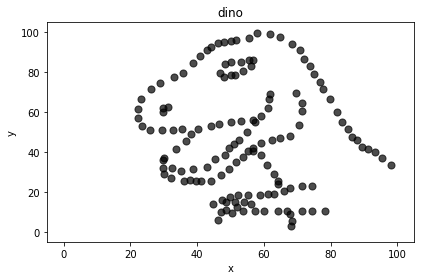

In [13]:
show_scatter(data, 'dino')

In [15]:
for dataset_name, data in df.groupby('dataset'):
    print(dataset_name, data.shape)

away (142, 3)
bullseye (142, 3)
circle (142, 3)
dino (142, 3)
dots (142, 3)
h_lines (142, 3)
high_lines (142, 3)
slant_down (142, 3)
slant_up (142, 3)
star (142, 3)
v_lines (142, 3)
wide_lines (142, 3)
x_shape (142, 3)


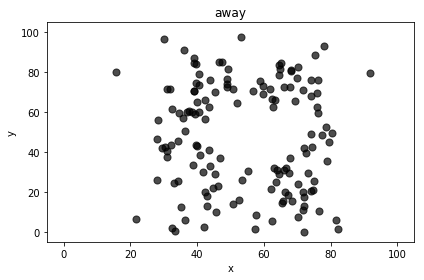

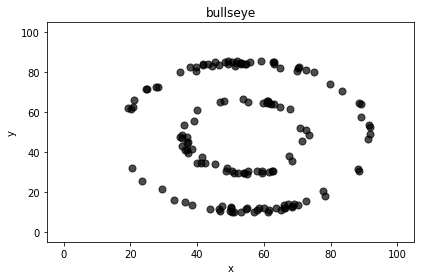

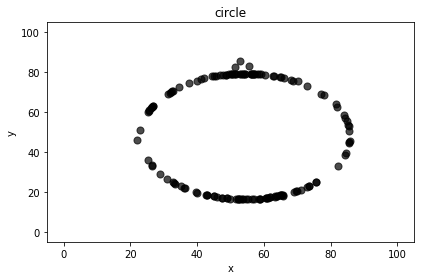

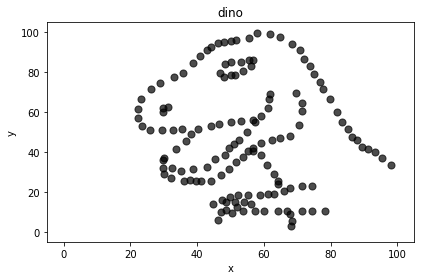

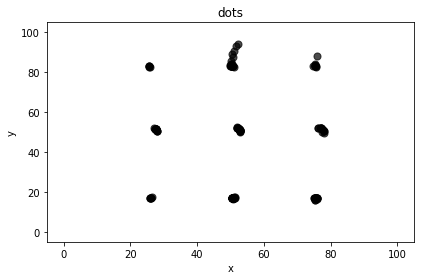

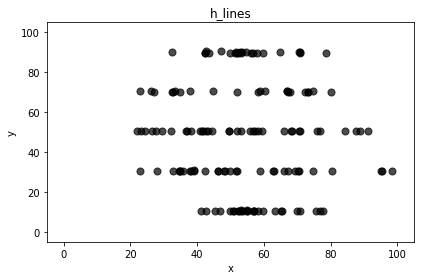

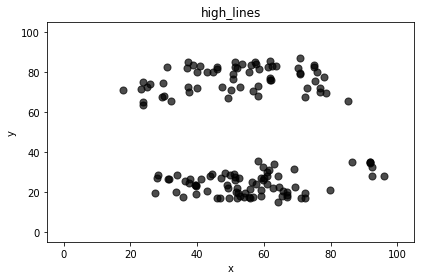

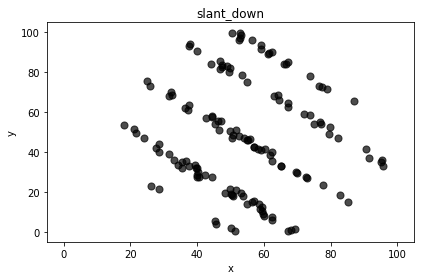

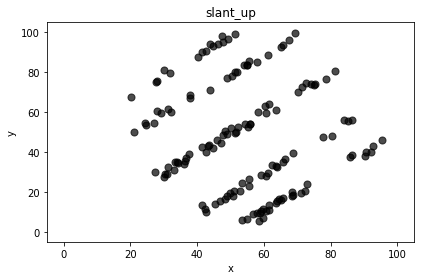

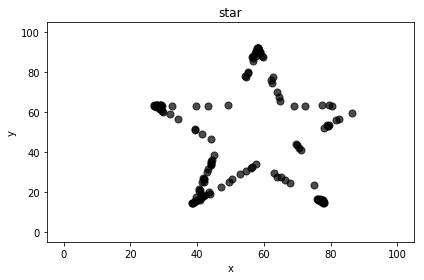

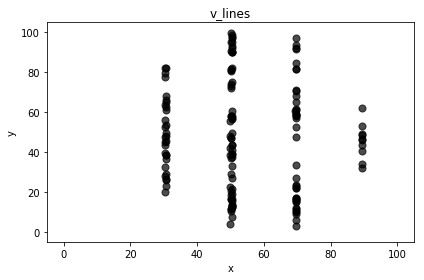

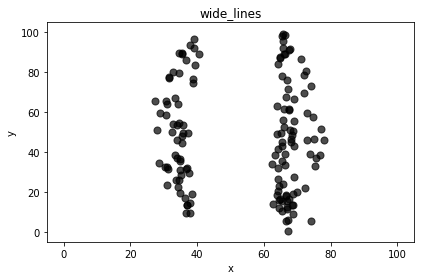

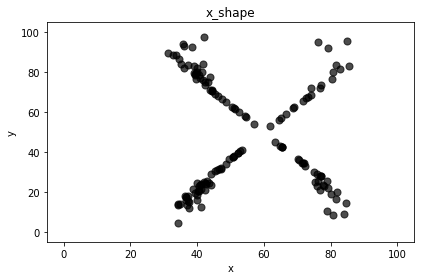

In [16]:
for dataset_name, data in df.groupby('dataset'):
    show_scatter(data, dataset_name)

In [22]:
## Saving a plot

# Creating a plotting function

def save_scatter(df, name, dp=72):
    show_scatter(df, name)
    plt.savefig(str(name) + ".png", dpi=dp)
    plt.clf()
    plt.cla()
    plt.close()

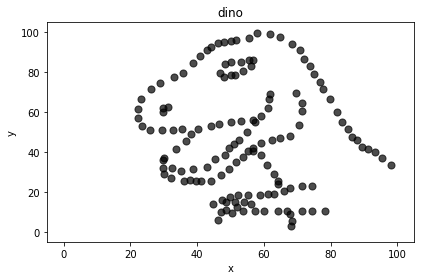

In [23]:
# Saving plot 1
save_scatter(get_dataset('dino'),"dino",dp =300)

### Discussion point 3:

#### But are statisticans so easily fooled?

#### What additional information do we glean from some further summary stats?

#### How else could we arrive at this information?

In [17]:
from scipy.stats import kurtosis
from scipy.stats import skew

## Skewedness tell you he amount and direction of skew, which is departure from horziontal symetery
## Kurtosis tells you how tall and sharp the central peak is relative to a standard bell curve
df1 = get_dataset('dino')

print('Dataset 1')
print('Kurtosis X =', round(kurtosis(df1.x),2))
print('Kurtosis Y =', round(kurtosis(df1.y),2))
print('Skew X =', round(skew(df1.x),2))
print('Skew Y =', round(skew(df1.y),2))


Dataset 1
Kurtosis X = -0.25
Kurtosis Y = -1.04
Skew X = 0.28
Skew Y = 0.25


In [18]:
df2 = get_dataset('star')

print('Dataset 2')
print('Kurtosis X =', round(kurtosis(df2.x),2))
print('Kurtosis Y =', round(kurtosis(df2.y),2))
print('Skew X =', round(skew(df2.x),2))
print('Skew Y =', round(skew(df2.y),2))


Dataset 2
Kurtosis X = -1.16
Kurtosis Y = -1.34
Skew X = 0.08
Skew Y = 0.24


### Discussion point 4:

#### What new information do we aquire when we plot a histogram?


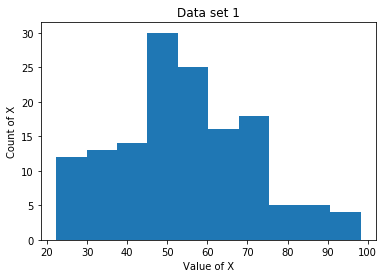

In [19]:
plt.hist(df1.x)
plt.title("Data set 1")
plt.xlabel("Value of X")
plt.ylabel("Count of X")
plt.show()

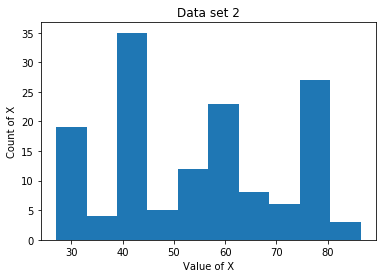

In [20]:
plt.hist(df2.x)
plt.title("Data set 2")
plt.xlabel("Value of X")
plt.ylabel("Count of X")
plt.show()

### Over to you:

<li> 1) Download the dataset: https://www.autodeskresearch.com/sites/default/files/SameStatsDataAndImages.zip </li>
<li> 2) Have a go at making some of your own scatter plots and histograms </li>
<li> 3) If you like email any you are particulary proud of (image and code) and we can start putting a gallery together which we can disucss as a group. </li>
<li> 4) Any questions from today?</li>
